# More visualizations + Advanced Pandas

In the class we talked about data visualization. Let us see some vizualization techniques, namely 3D bar charts and maps.

## 3D bar charts

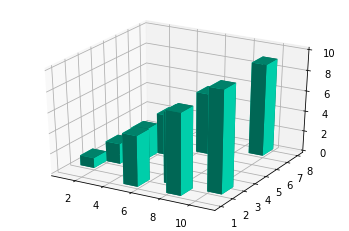

In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xpos = [1,2,3,4,5,6,7,8,9,10]
ypos = [2,3,4,5,1,6,2,1,7,2]
num_elements = len(xpos)
zpos = [0,0,0,0,0,0,0,0,0,0]
dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa')
plt.show()

## Maps

Many times we need to show something on the map. How do we do it?

In [5]:
# install folium
!pip install folium

    100% |████████████████████████████████| 92kB 1.7MB/s ta 0:00:011


In [13]:
# import the library
import folium
import pandas as pd
 
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10, 12, 40, 70, 23, 43, 100, 43]
})
data

,lat,lon,name,value
0,-58.00,-34.00,Buenos Aires,10
1,2.00,49.00,Paris,12
2,145.00,-38.00,melbourne,40
3,30.32,59.93,St Petersbourg,70
4,-4.03,5.33,Abidjan,23
5,-73.57,45.52,Montreal,43
6,36.82,-1.29,Nairobi,100
7,-38.50,-12.97,Salvador,43


In [12]:
data.dtypes

lat      float64
lon      float64
name      object
value      int64
dtype: object

In [14]:
# Make an empty map
m = folium.Map(location=[20,0], tiles="Stamen Toner", zoom_start=2)
 
# we can add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=float(data.iloc[i]['value'])*10000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

# show the map
m

In [15]:
# You can also save it as html
m.save('mymap.html')

# Part 1. Simple Aggregations

We move to more advanced functions in Pandas, such as aggregations.
You can open the file 

`3.Pandas_Aggregate.pdf` 

in the github repo and follow along with the slides.

First we load our data file.

In [16]:
# Read in data
myData=pd.read_csv("https://raw.githubusercontent.com/ahmadajal/DM_ML_course_public/master/2%263.%20Data%26EDA/data/transactions_students.csv", sep=",")
myData.head(3)


,Customer,TransDate,Quantity,PurchAmount,Cost,TransID
0,149332,15.11.2005,1,199.95,107.0,127998739
1,172951,29.08.2008,1,199.95,108.0,128888288
2,120621,19.10.2007,1,99.95,49.0,125375247


In [17]:
myData.dtypes

Customer         int64
TransDate       object
Quantity         int64
PurchAmount    float64
Cost           float64
TransID          int64
dtype: object

In [19]:
# Adjust the format of column "TransDate" to datetime
myData["TransDate"]  = pd.to_datetime(myData["TransDate"], dayfirst=True)

# Alternative conversion: Convert date from string to date times
# import dateutil
# myData["TransDate"] = myData["TransDate"].apply(dateutil.parser.parse, dayfirst=True)

In [20]:
myData.dtypes

Customer                int64
TransDate      datetime64[ns]
Quantity                int64
PurchAmount           float64
Cost                  float64
TransID                 int64
dtype: object

## Sum all purchase amounts by customer

In [24]:
pd.options.display.max_rows = 10 # just show 10 rows
myData.groupby("Customer", as_index=False)["PurchAmount"].sum()

,Customer,PurchAmount
0,100001,279.90
1,100002,499.95
2,100003,379.90
3,100004,499.95
4,100005,309.80
...,...,...
98775,199995,89.85
98776,199996,179.95
98777,199997,179.70
98778,199998,29.95


In [25]:
# alternative option: using agg
# Aggregate a variable by one dimension 
myData.groupby("Customer", as_index=False)["PurchAmount"].agg(["sum"]).rename(columns={"PurchAmount":"AggPurch"})

,sum
Customer,
100001,279.90
100002,499.95
100003,379.90
100004,499.95
100005,309.80
...,...
199995,89.85
199996,179.95
199997,179.70


## Multiple aggregations

In [26]:
#Apply multiple aggregation functions to a variable by one dimension
myData.groupby("Customer", as_index=False)["PurchAmount"].agg({"AggPurch": "sum", "Purch_max": "max"})


,Customer,AggPurch,Purch_max
0,100001,279.90,199.95
1,100002,499.95,499.95
2,100003,379.90,249.95
3,100004,499.95,499.95
4,100005,309.80,79.95
...,...,...,...
98775,199995,89.85,29.95
98776,199996,179.95,179.95
98777,199997,179.70,29.95
98778,199998,29.95,29.95


## Apply an aggregating function to the whole dataset

In [27]:
myData["PurchAmount"].sum()

18784784.62

## Create new columns with the transform()-function

Here we add a new column `AggPurch` which holds for every customer the total of her purchases.

In [29]:
myData["AggPurch"]=myData.groupby("Customer")["PurchAmount"].transform(sum)
myData.head()

,Customer,TransDate,Quantity,PurchAmount,Cost,TransID,AggPurch
0,149332,2005-11-15,1,199.95,107.00,127998739,274.85
1,172951,2008-08-29,1,199.95,108.00,128888288,889.80
2,120621,2007-10-19,1,99.95,49.00,125375247,99.95
3,149236,2005-11-14,1,39.95,18.95,127996226,119.90
4,149236,2007-06-12,1,79.95,35.00,128670302,119.90


## Apply an aggregating function to multiple variables


In [30]:
myData.groupby("Customer", as_index=False).agg({"PurchAmount":["max","sum"], "Quantity":"sum"})

Customer PurchAmount         Quantity
                       max     sum      sum
0       100001      199.95  279.90        2
1       100002      499.95  499.95        1
2       100003      249.95  379.90        2
3       100004      499.95  499.95        1
4       100005       79.95  309.80        4
...        ...         ...     ...      ...
98775   199995       29.95   89.85        3
98776   199996      179.95  179.95        1
98777   199997       29.95  179.70        6
98778   199998       29.95   29.95        1
98779   199999      179.95  179.95        1

[98780 rows x 4 columns]

## Aggregate multiple variables by two dimensions

In [31]:
myData.groupby(["Customer","TransDate"])["PurchAmount","Quantity"].sum()

PurchAmount  Quantity
Customer TransDate                        
100001   2011-06-25        79.95         1
         2011-08-24       199.95         1
100002   2004-12-29       499.95         1
100003   2012-01-23       379.90         2
100004   2012-08-05       499.95         1
...                          ...       ...
199995   2012-09-17        89.85         3
199996   2012-09-17       179.95         1
199997   2012-09-17       179.70         6
199998   2012-09-17        29.95         1
199999   2012-09-17       179.95         1

[135038 rows x 2 columns]

## Aggregation for subset of rows

In [32]:
myData.iloc[1:6].groupby("Customer", as_index=False)["PurchAmount"].sum()

,Customer,PurchAmount
0,120621,99.95
1,140729,129.95
2,149236,119.90
3,172951,199.95


---
# Exercise
---
1. Sum `PurchAmount` by `Customer` and `TransDate` (hint: group by both `Customer` and `TransDate`)
2. Count the number of transactions by `Customer`(hint: use the `size()` function)

---

In [34]:
# your code here



# Part 2: Advanced aggregation topics and chaining

Here, we continue onto slide `21` in the `3.Pandas_Aggregate.pdf`.

First we will sum the purchase amounts month-by-month.


In [42]:
# Aggregate by transformed dimension
# dt.to_period("M") will remove the day from a date.
myData.groupby(myData["TransDate"].dt.to_period("M"))[["PurchAmount"]].sum()

,PurchAmount
TransDate,
2004-12,27623.90
2005-01,83363.73
2005-02,87341.59
2005-03,86803.31
2005-04,84293.01
...,...
2012-08,108462.20
2012-09,71429.25
2012-10,42588.75


Now, we select all aggregations where the aggregated amount sum per customer is more than 100.

In [41]:
# sidenote chaining
myData.groupby("Customer")[["PurchAmount"]].sum()[lambda x: x >= 100]

,PurchAmount
Customer,
100001,279.90
100002,499.95
100003,379.90
100004,499.95
100005,309.80
...,...
199995,NaN
199996,179.95
199997,179.70


In [43]:
# alternative
myData2=myData.groupby("Customer", as_index=False)["PurchAmount"].agg({"AggPurch": "sum"})
myData2.loc[myData2["AggPurch"]>=100]

,Customer,AggPurch
0,100001,279.90
1,100002,499.95
2,100003,379.90
3,100004,499.95
4,100005,309.80
...,...,...
98769,199989,119.80
98771,199991,199.95
98776,199996,179.95
98777,199997,179.70


---
# Exercise
---
1. Aggregate the purchase amount (sum) of all transactions per customer on a yearly basis for eyar 2007 and 2008.
2. How many customers purchased more than 50$ in total between 2008 and 2009?
---

In [ ]:
# Question 1.
# Part1 use the loc function and select the year 2007 OR 2008 using: dt.year=200X to select years 
# use the | to select 2007 or 2008
myData.loc[(myData["TransDate"].    | myData["TransDate"]  )] \
# part2: groupby([myData["TransDate"].dt.year, "Customer"])
.groupby(...)\
# part 3: take the sum() on the PurchAmount
[".."].sum()

In [ ]:
# Question 2. How many customers purchased for more than 50$ in total between 2008 and 2009

# part 1: select rows with year 2008 or 2009 using the loc function

# part 2: groupby("Customer")

# part 3: take the sum() on the PurchAmount

# take the count() on those aggregations that have sum more than 50$, hint [lambda x:x >50]



# Part 3. Selecting using an aggregating dimension

Right about now, we are at slide `26` of the walk-through.

## Select the first three purchases of each customer

In [44]:
# sort by asceling order ot customer
myData.groupby("Customer").head(3).sort_values("Customer")

,Customer,TransDate,Quantity,PurchAmount,Cost,TransID,AggPurch
198456,100001,2011-06-25,1,79.95,27.00,130025578,279.90
198455,100001,2011-08-24,1,199.95,90.00,123457297,279.90
44541,100002,2004-12-29,1,499.95,349.00,123490350,499.95
214846,100003,2012-01-23,1,129.95,66.92,123457694,379.90
214845,100003,2012-01-23,1,249.95,202.60,123457694,379.90
...,...,...,...,...,...,...,...
223182,199997,2012-09-17,1,29.95,13.80,132481149,179.70
223183,199997,2012-09-17,1,29.95,13.80,132481149,179.70
223184,199997,2012-09-17,1,29.95,13.80,132481149,179.70
223188,199998,2012-09-17,1,29.95,13.80,132481154,29.95


## Updating columns by aggregate dimension

In [45]:
# save the total number of occurences per customer in the count column
myData["Count"]= myData.groupby("Customer")["Customer"].transform("size")
myData

#myData.groupby("Customer")["Customer"].transform("count")


,Customer,TransDate,Quantity,PurchAmount,Cost,TransID,AggPurch,Count
0,149332,2005-11-15,1,199.95,107.00,127998739,274.85,3
1,172951,2008-08-29,1,199.95,108.00,128888288,889.80,4
2,120621,2007-10-19,1,99.95,49.00,125375247,99.95,1
3,149236,2005-11-14,1,39.95,18.95,127996226,119.90,2
4,149236,2007-06-12,1,79.95,35.00,128670302,119.90,2
...,...,...,...,...,...,...,...,...
223186,199997,2012-09-17,1,29.95,13.80,132481149,179.70,6
223187,199997,2012-09-17,1,29.95,13.80,132481149,179.70,6
223188,199998,2012-09-17,1,29.95,13.80,132481154,29.95,1
223189,199999,2012-09-17,1,179.95,109.99,132481165,179.95,1


## Updating columns by aggregate dimension

In [47]:
#counts the total number of transactions per customer
myData["RelDate"]=myData.groupby("Customer").cumcount()+1
myData

,Customer,TransDate,Quantity,PurchAmount,Cost,TransID,AggPurch,Count,RelDate
0,149332,2005-11-15,1,199.95,107.00,127998739,274.85,3,1
1,172951,2008-08-29,1,199.95,108.00,128888288,889.80,4,1
2,120621,2007-10-19,1,99.95,49.00,125375247,99.95,1,1
3,149236,2005-11-14,1,39.95,18.95,127996226,119.90,2,1
4,149236,2007-06-12,1,79.95,35.00,128670302,119.90,2,2
...,...,...,...,...,...,...,...,...,...
223186,199997,2012-09-17,1,29.95,13.80,132481149,179.70,6,5
223187,199997,2012-09-17,1,29.95,13.80,132481149,179.70,6,6
223188,199998,2012-09-17,1,29.95,13.80,132481154,29.95,1,1
223189,199999,2012-09-17,1,179.95,109.99,132481165,179.95,1,1


---
# Exercise: Select using an aggregating dimensions
---

Add a column to `myData` with the total number of purchases per customer.

**Hint:** Use the `transform("size")` function.

In [ ]:
# your solution
myData["Count"]=...